In [7]:
import torch
import torch.optim as optim
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np


In [21]:

def mock_classifier(x):
    return torch.rand((1, 10), requires_grad=True)  

def adversarial_loss(output, target):  
    target_score = output[0, target]
    return -target_score  
    
def draw_mask(center, rays, angles, image_size):
    image = Image.new('L', image_size, 0)
    draw = ImageDraw.Draw(image)
    for angle, ray in zip(angles, rays):
        end_x = int(center[0] + ray * np.cos(angle))
        end_y = int(center[1] + ray * np.sin(angle))
        draw.line([center, (end_x, end_y)], fill=255, width=10)
    return np.array(image)


In [22]:

def generate_adversarial_patch(initial_shape, target_class, iterations=500):
    center = (250, 250)
    image_size = (500, 500)
    angles = np.linspace(0, 2 * np.pi, len(initial_shape), endpoint=False)

    rays = np.random.uniform(50, 150, len(initial_shape))
    texture = torch.rand(3, *image_size, requires_grad=True)
    optimizer = optim.Adam([texture], lr=0.01)

    for i in range(iterations):
        optimizer.zero_grad()

        # Simulate classifier output and compute loss
        output = mock_classifier(texture)
        loss = adversarial_loss(output, target_class)
        loss.backward()
        optimizer.step()

        if i % 10 == 0:
            print(f"Iteration {i}, Loss: {loss.item()}")

    # Generate mask for visualization only
    mask = draw_mask(center, rays, angles, image_size)
    mask_tensor = torch.from_numpy(mask).to(torch.float32).unsqueeze(0) / 255.0

    patch_array = texture.detach() * mask_tensor
    patch_array = patch_array.permute(1, 2, 0).numpy()  
    return patch_array



Iteration 0, Loss: -0.5084506273269653
Iteration 10, Loss: -0.08906173706054688
Iteration 20, Loss: -0.4459388852119446
Iteration 30, Loss: -0.7779527306556702
Iteration 40, Loss: -0.5422667264938354
Iteration 50, Loss: -0.13055086135864258
Iteration 60, Loss: -0.6415572166442871
Iteration 70, Loss: -0.8142387270927429
Iteration 80, Loss: -0.23976916074752808
Iteration 90, Loss: -0.1379697322845459
Iteration 100, Loss: -0.4048614501953125
Iteration 110, Loss: -0.41698360443115234
Iteration 120, Loss: -0.9538891315460205
Iteration 130, Loss: -0.2094273567199707
Iteration 140, Loss: -0.6963130235671997
Iteration 150, Loss: -0.3143315315246582
Iteration 160, Loss: -0.06971299648284912
Iteration 170, Loss: -0.0519559383392334
Iteration 180, Loss: -0.781075656414032
Iteration 190, Loss: -0.0512847900390625
Iteration 200, Loss: -0.8046348690986633
Iteration 210, Loss: -0.8921080231666565
Iteration 220, Loss: -0.011060833930969238
Iteration 230, Loss: -0.24650490283966064
Iteration 240, Loss:

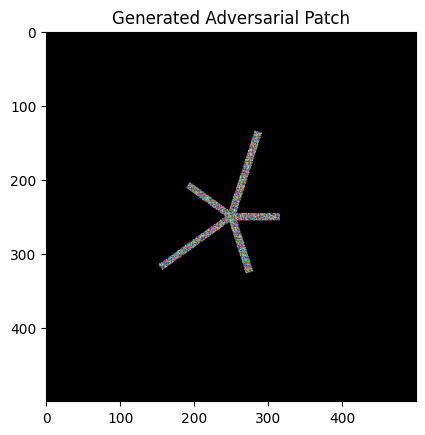

In [23]:
target_class = 7
patch = generate_adversarial_patch([50, 0, 90, 110, 20], target_class)
plt.imshow(patch)
plt.title("Generated Adversarial Patch")
plt.show()


In [ ]:
now i want to apply that patch on VGG net classifier and also save the patched image, generate the whole code error free format
